In [1]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from parallel_generalist import run as run_parallel
from transfer_generalist import run as run_transfer

def get_results(algorithm, gens):

    means = []
    bests =[]
    div = []
    pops = []
    envs = []

    for i in range(10):
        run_results, pop, env = algorithm(gens=gens)
        
        means.append(run_results['mean'])
        bests.append(run_results['best'])
        div.append(run_results['div'])
        pops.append(pop)
        envs.append(env)

    return means, bests, div, pops, envs



p_means, p_bests, p_div, p_pops, p_envs = get_results(run_parallel, gens=50)



pygame 2.5.1 (SDL 2.28.2, Python 3.9.10)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: yes

enemies list: 1 2 3 4 5 6 7 8

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 18.440901 -5.589913 3.833922
Initial mutation rate: 0.2
diversity 26.227427500168304
Mutation rate increased to 0.22000000000000003 at diversity 26.227427500168304
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 18.440900770240805 - Mean: -4.9977720142846
Gen 1 - Diversity: 26.8081334

In [2]:
t_means, t_bests, t_div, t_pops, t_envs = get_results(run_transfer, gens=50)



MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 92.372379 11.370941 32.601005
Initial mutation rate: 0.2
diversity 26.265839218159474
Mutation rate increased to 0.22000000000000003 at diversity 26.265839218159474
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 92.37237888630936 - Mean: 15.660560089587499
diversity 26.479993948848737
Mutation rate at generation 2: 0.22000000000000003
Gen 2 - Best: 92.37237888630936 - Mean: 21.121503814408666
diversity 26.569

In [3]:
import dill

parallel_res = {
    'p_means': p_means,
    'p_bests': p_bests,
    'p_div': p_div,
    'p_pops': p_pops,
}

file_path = 'parallel_res.pkl'

with open(file_path, 'wb') as file:
    dill.dump(parallel_res, file)

print("Variables saved as pickle in", file_path)


Variables saved as pickle in parallel_res.pkl


In [4]:
transfer_res = {
    't_means': t_means,
    't_bests': t_bests,
    't_div': t_div,
    't_pops': t_pops,
}

file_path = 'transfer_res.pkl'

with open(file_path, 'wb') as file:
    dill.dump(transfer_res, file)

print("Variables saved as pickle in", file_path)

Variables saved as pickle in transfer_res.pkl


In [20]:
file_path = 'parallel_res.pkl'  # Change this to the actual file path

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data = dill.load(file)

# Retrieve the variables from the loaded data
p_means = loaded_data['p_means']
p_bests = loaded_data['p_bests']
p_div = loaded_data['p_div']
p_pops = loaded_data['p_pops']


In [5]:
# Find the enemy difficulty by sorting 
from parallel_generalist import evaluate_gain

import matplotlib.pyplot as plt

# gens = 30

m = 0
for i, mean in enumerate(p_means):
    v = np.max(mean)
    if v > m:
        m = v
        idx = i
print(idx)

best_pop = p_pops[idx]
best_env = p_envs[idx]

print(p_envs[0])
#r = evaluate_gain_all_enemies(best_pop, p_envs[idx])
# print(r)

# print(p_envs[idx])
# env.update_parameter("enemies", [enemy])
# evaluate_gain(best_pop)

best_env.update_parameter("multiplemode", "no")

scores = []
for enemy in range(1, 9):
    best_env.update_parameter("enemies", [enemy])
    r = evaluate_gain(best_env, best_pop)
    scores.append((enemy, np.mean(r)))

# sort scores by gain
order = sorted(scores, key=lambda x: x[1], reverse=True)
    
order 


1

PARAMETER CHANGE: multiplemode = no

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [7]

PARAMETER CHANGE: enemies = [8]


[(5, 62.890000000000335),
 (2, 58.74),
 (7, -9.70799999999998),
 (8, -15.867999999999899),
 (3, -51.58),
 (6, -61.7),
 (4, -68.8),
 (1, -72.0)]

In [6]:
m = 0
for i, mean in enumerate(t_means):
    v = np.max(mean)
    if v > m:
        m = v
        idx = i
print(idx)

best_t_pop = t_pops[idx]
best_t_env = t_envs[idx]

7


In [21]:
# for i in [1,2,4]:
#     plt.figure()
#     plt.plot(results_d[i]['div'], label='enhanced')
#     plt.plot(results_b[i]['div'], label='base')
#     plt.legend()
#     plt.title('Diversity over generations for enemy ' + str(i))

#     plt.xlabel('Generation')
#     plt.ylabel('Diversity')
# results_b[i]['div']
mean_p_div = np.mean(p_div, axis=0)
mean_t_div = np.mean(t_div, axis=0)
plt.figure()

plt.plot(mean_p_div, label='parallel')
plt.plot(mean_t_div, label='transfer')
plt.legend()
plt.title('Diversity over generations for all enemies')

plt.xlabel('Generation')
plt.ylabel('Diversity')



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [19]:
from scipy.stats import ttest_ind
t_scores = []
for i in [1,2,4]:
    d = evaluate_gain(envs_d[i], pops_d[i])
    b = evaluate_gain(envs_b[i], pops_b[i])
    t_scores.append(ttest_ind(b, d))

In [8]:
def hp_simulation(env, x):
    f, p, e, t = env.play(pcont=x)
    return p, e

def evaluate_hp(env, x):
    return np.array(list(map(lambda y: hp_simulation(env, y)[0], x))), np.array(list(map(lambda y: hp_simulation(env, y)[1], x)))



In [9]:
def generate_table(pop, env):
    table = np.zeros((2,8))
    for enemy in range(8):
        for run in range(5):
            env.update_parameter("enemies", [enemy+1])
            p, e = evaluate_hp(env, pop)
            table[0, enemy] = np.mean(p)
            table[1, enemy] = np.mean(e)
    return table

t_table = generate_table(best_t_pop, best_t_env)
p_table = generate_table(best_pop, best_env)

print(np.sum(t_table[1]))
print(np.sum(p_table[1]))


PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER

In [23]:
best_env.play(best_pop[0])

(87.54110614572687, 34.60000000000027, 0, 372)

In [10]:
print(t_table)
print(p_table)

[[17.24   5.68   2.32   0.    71.656  0.     0.91   0.67 ]
 [14.3   55.1   48.9   73.1    8.7   86.1   78.2   66.   ]]
[[ 0.    60.34   0.12   0.    62.89   0.     0.992  6.132]
 [72.     1.6   51.7   68.8    0.    61.7   10.7   22.   ]]


In [19]:
# calculate average over p_means
p_means_avg = np.mean(p_means, axis=0)
p_bests_avg = np.mean(p_bests, axis=0)
p_means_std = np.std(p_means, axis=0)
p_bests_std = np.std(p_bests, axis=0)




Text(0, 0.5, 'Fitness')

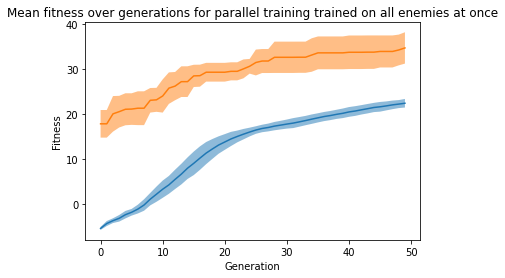

In [20]:
plt.figure()
plt.plot(p_means_avg, label='mean')
plt.plot(p_bests_avg, label='best')

plt.fill_between(range(len(p_means_avg)), p_means_avg-p_means_std, p_means_avg+p_means_std, alpha=0.5)
plt.fill_between(range(len(p_bests_avg)), p_bests_avg-p_bests_std, p_bests_avg+p_bests_std, alpha=0.5)

    
plt.title('Mean fitness over generations for parallel training trained on all enemies at once')
plt.xlabel('Generation')
plt.ylabel('Fitness')

Text(0, 0.5, 'Fitness')

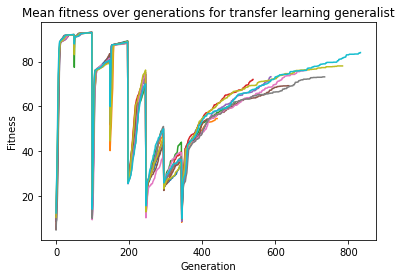

In [12]:
plt.figure()

for i in range(10):
    plt.plot(t_means[i])
plt.title('Mean fitness over generations for transfer learning generalist')
plt.xlabel('Generation')
plt.ylabel('Fitness')

In [14]:
shp = np.array(t_means)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [15]:
gains = []

gain_p = np.zeros(100,)
gain_t = np.zeros(100,)
for _ in range(5):
    gain_p += evaluate_gain(best_env, best_pop)
    gain_t += evaluate_gain(best_t_env, best_t_pop)
    
gains.append(gain_p/5)
gains.append(gain_t/5)

Text(0.5, 1.0, 'individual gain for parallel learning and transfer learning for all enemies')

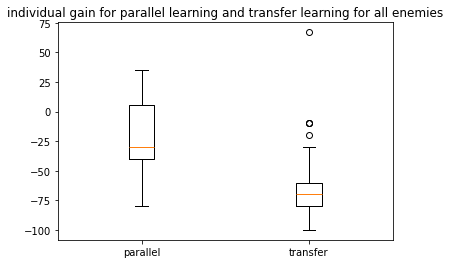

In [16]:
plt.boxplot(gains)
plt.xticks([1, 2], ["parallel", "transfer"])
plt.title('individual gain for parallel learning and transfer learning for all enemies')